<hr>
<div style="background-color: lightgray; padding: 20px; color: black;">
<div>
<img src="https://th.bing.com/th/id/R.3cd1c8dc996c5616cf6e65e20b6bf586?rik=09aaLyk4hfbBiQ&riu=http%3a%2f%2fcidics.uanl.mx%2fwp-content%2fuploads%2f2016%2f09%2fcimat.png&ehk=%2b0brgMUkA2BND22ixwLZheQrrOoYLO3o5cMRqsBOrlY%3d&risl=&pid=ImgRaw&r=0" style="float: right; margin-right: 30px;" width="200"/> 
<font size="5.5" color="8C3061"><b>Rest-Mex: Research on Sentiment Analysis Task for Mexican Tourist Texts 🇲🇽</b></font> <br>
<font size="5.5" color="8C3061"><b>Database Analysis</b></font> 
</div>
<div style="text-align: left">  <br>
Edison David Serrano Cárdenas<br>
Ezau Faridh Torres Torres <br><br>
MSc en Matemáticas Aplicadas; CIMAT - Sede Guanajuato <br>
</div>

</div>
<hr>

***Load libraries:***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import re
import unicodedata

import sys 
import os

# Load the parent directory to access the src module
sys.path.append("../")
from src.dp import load_data

np.random.seed(2025)

# <font color="8C3061" >**Objetives:**</font> 

Create a data analysis for data processing automatization

<details>
<summary><strong>Data Analysis Edison </strong></summary>

- [x] Desbalance de clases 
  - [x] Geomap analysis (Municipios,Estados) (Edi)
- [x] Statistics:  Validate statistics provide in the data description. (Edi)
- [ ] Language: Spanish, English (quantification).                      (Edi)
- [ ] Stopwords: Validación de relevancia, conteo, metricas.            (Edi)
- [ ] Uppercase Analysis        
</details>

<details >
<summary ><strong>Data Analysis Ezau </strong></summary>

- [ ] Desbalance de clases 
  - [ ] Bar Plots, Bubble Plots (Ezau) 
- [ ] Missespelling: Bad words with embedding.                          (Ezau)
- [ ] Emoji or Text faces (Great Relevance)                             (Ezau)
- [ ] Uppercase Analysis        
  
</details>

<div class="alert alert-block alert-info"> 
<b>TO-DO:</b> Assign task for Data Processing and divide responsabilities.
</div>

<details >
<summary ><strong> Data Cleaning and Feature Extraction </strong></summary>
                   
- [x] Categorized variables
- [x] Numerical Variables
- [ ] Reviews and Titles 
- [ ] Word's doesn't belong to Spanish Language 
    - [ ] Using a Spanish Dictionary (spaCy)
    - [ ] Using a Spanish Word List (nltk & wordlist-es)
- [ ] Missespelling and      
</details>




***Data Loading:***

In [2]:
ld = load_data()
data = ld.read_data()

### <font color="8C3061" >**Exploratory Analysis:**</font> 

***Data Structure:***

In [3]:
data.head()

,Title,Review,Polarity,Town,Region,Type
0,Mi Lugar Favorito!!!!,Excelente lugar para comer y pasar una buena n...,5.0,Sayulita,Nayarit,Restaurant
1,lugares interesantes para visitar,"andar mucho, así que un poco difícil para pers...",4.0,Tulum,QuintanaRoo,Attractive
2,No es el mismo Dreams,"Es nuestra cuarta visita a Dreams Tulum, elegi...",3.0,Tulum,QuintanaRoo,Hotel
3,un buen panorama cerca de CancÃºn,"Estando en CancÃºn, fuimos al puerto y tomamos...",4.0,Isla_Mujeres,QuintanaRoo,Attractive
4,El mejor,Es un lugar antiguo y por eso me encanto tiene...,5.0,Patzcuaro,Michoacan,Hotel


Each arrow contains 6 columns:

1. **Title**: The title that the tourist assigned to their opinion. Data type: Text.
2. **Review**: The opinion issued by the tourist. Data type: Text.
3. **Polarity**: The label representing the sentiment polarity of the opinion. Data type: [1, 2, 3, 4, 5].
4. **Town**: The town where the review is focused. Data type: Text.
5. **Region**: The region (state in Mexico) where the town is located. Data type: Text. This feature is not intended to be classified but is provided as additional information that could be leveraged in classification models.
6. **Type**: The type of place the review refers to. Data type: [Hotel, Restaurant, Attractive].

***Polarity Explanation***

The polarity score ranges from 1 (most dissatisfied) to 5 (most satisfied) and can be interpreted as follows:

1. Very bad
2. Bad
3. Neutral
4. Good
5. Very good

***Data Cleaning:***

There are two reviews without title:

In [6]:
null_mask = data.isnull().any(axis=1)
data[null_mask]

,Title,Review,Polarity,Town,Region,Type
353,NaN,El servicing fue maravilloso y la comida delic...,5.0,Tulum,QuintanaRoo,Restaurant
138105,NaN,Me encantan las cuevas aquí. El agua aquí es p...,5.0,Tulum,QuintanaRoo,Attractive


*Category variables analysis:*

In [7]:
data["Type"].unique()

array(['Restaurant', 'Attractive', 'Hotel'], dtype=object)

In [8]:
data["Town"].unique()

array(['Sayulita', 'Tulum', 'Isla_Mujeres', 'Patzcuaro', 'Palenque',
       'Valle_de_Bravo', 'Ixtapan_de_la_Sal', 'Creel', 'Taxco',
       'Valladolid', 'Izamal', 'San_Cristobal_de_las_Casas', 'Atlixco',
       'Tequisquiapan', 'Ajijic', 'Teotihuacan', 'Tequila', 'Bacalar',
       'TodosSantos', 'Parras', 'Coatepec', 'Huasca_de_Ocampo',
       'Tepoztlan', 'Cholula', 'Cuatro_Cienegas', 'Metepec', 'Loreto',
       'Orizaba', 'Tlaquepaque', 'Cuetzalan', 'Bernal', 'Xilitla',
       'Malinalco', 'Real_de_Catorce', 'Chiapa_de_Corzo', 'Mazunte',
       'Tepotzotlan', 'Zacatlan', 'Dolores_Hidalgo', 'Tapalpa'],
      dtype=object)

In [9]:
data["Region"].unique()

array(['Nayarit', 'QuintanaRoo', 'Michoacan', 'Chiapas',
       'Estado_de_Mexico', 'Chihuahua', 'Guerrero', 'Yucatan', 'Puebla',
       'Queretaro', 'Jalisco', 'Baja_CaliforniaSur', 'Coahuila',
       'Veracruz', 'Hidalgo', 'Morelos', 'San_Luis_Potosi', 'Oaxaca',
       'Guanajuato'], dtype=object)

In [10]:
data["Polarity"].unique()

array([5., 4., 3., 1., 2.])

***Descriptive Analysis:***

- Visualizing Geographical Data:

In [11]:
states = ld.read_states_map()


def normalize_state_name(name):
    name = name.lower()
    name = unicodedata.normalize("NFD", name)
    name = re.sub(r'[\u0300-\u036f]', '', name)
    name = re.sub(r'\s+|_', '', name)
    name = re.sub(r'[^\w]', '', name) 
    if name == "mexico":
        name = "estadodemexico"
    if name == "michoacandeocampo":
        name = "michoacan"
    if name == "veracruzdeignaciodelallave":
        name = "veracruz"
    if name == "coahuiladezaragoza":
        name = "coahuila"
    return name

states["NOMGEO"] = states["NOMGEO"].apply(normalize_state_name)
data["Region"] = data["Region"].apply(normalize_state_name)
merged = states.merge(data.groupby("Region").agg({"Town":"size"}), left_on="NOMGEO", right_index=True, how="left")

DataSourceError: NOMGEO                                           geometry0      aguascalientes  POLYGON ((2470517.824 1155028.588, 2470552.248...1      bajacalifornia  MULTIPOLYGON (((1493197.166 1849625.247, 14934...2   bajacaliforniasur  MULTIPOLYGON (((1694656.344 1227647.637, 16946...3            campeche  MULTIPOLYGON (((3544897.199 946994.621, 354491...4            coahuila  POLYGON ((2469954.193 1978522.993, 2469982.807...5              colima  MULTIPOLYGON (((1157633.318 768573.525, 115772...6             chiapas  POLYGON ((3560747.319 695090.732, 3561146.749 ...7           chihuahua  POLYGON ((1961978.327 2201082.365, 1961978.967...8      ciudaddemexico  POLYGON ((2802175.66 843326.718, 2801806.564 8...9             durango  POLYGON ((2107050.444 1641943.398, 2109767.527...10         guanajuato  POLYGON ((2566856.637 1091418.135, 2567910.861...11           guerrero  MULTIPOLYGON (((2723457.629 539108.729, 272355...12            hidalgo  POLYGON ((2862894.736 1047165.224, 2862941.878...13            jalisco  MULTIPOLYGON (((2204875.697 806482.707, 220488...14     estadodemexico  POLYGON ((2717218.9 921748.845, 2717277.833 92...15          michoacan  POLYGON ((2498953.539 930779.82, 2498903.253 9...16            morelos  POLYGON ((2808476.273 786837.161, 2808717.307 ...17            nayarit  MULTIPOLYGON (((2161261.691 1008297.886, 21612...18          nuevoleon  POLYGON ((2695225.697 1731414.724, 2696948.204...19             oaxaca  MULTIPOLYGON (((3120848.31 424036.022, 3120862...20             puebla  POLYGON ((2930806.28 987523.589, 2930857.791 9...21          queretaro  POLYGON ((2789578.589 1075590.981, 2790053.712...22        quintanaroo  MULTIPOLYGON (((4039086.131 787620.709, 403895...23      sanluispotosi  POLYGON ((2640890.453 1374316.087, 2641215.593...24            sinaloa  MULTIPOLYGON (((2050677.49 1245244.569, 205066...25             sonora  MULTIPOLYGON (((1621359.972 1783423.44, 162133...26            tabasco  POLYGON ((3505265.8 767356.609, 3505486.1 7669...27         tamaulipas  POLYGON ((2724530.125 1735179.945, 2724595.848...28           tlaxcala  POLYGON ((2912153.554 863641.586, 2912195.798 ...29           veracruz  MULTIPOLYGON (((3119599.686 810246.093, 311958...30            yucatan  MULTIPOLYGON (((3511760.832 1023282.324, 35117...31          zacatecas  POLYGON ((2515182.307 1441549.749, 2515937.734...: File name too long

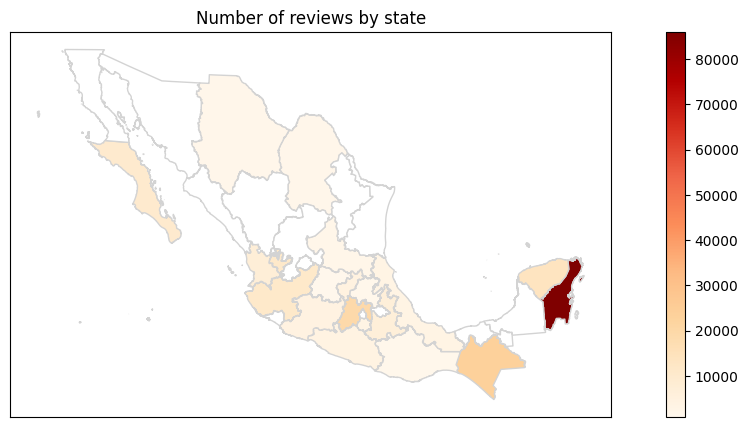

In [ ]:
merged.plot(column="Town", 
            legend=True, 
            figsize=(14,5), 
            cmap='YlGnBu',
            edgecolor='lightgrey',
            missing_kwds={'color': 'white'} )
plt.xticks([])
plt.yticks([])
plt.title("Number of reviews by state")
plt.show()

### Statistics:

#### Polarity

|Class | Instances|
|------|---------|
|    1 |   5,441 |
|    2 |   5,496 |
|    3 |  15,519 |
|    4 |  45,034 |
|    5 | 136,561 |
|Total | 208,051 |

#### Type

|     Class | Instances |
|-----------|-----------|
|     Hotel |  51,410   |
|Restaurant |  86,720   |
|Attractive |  69,921   |
|     Total | 208,051   |


#### Top 40 Selected Towns

|    Town                         |  Count    |
|-------------------------------- |-------    |
| 1. Tulum                        | 45,345    |
| 2. Isla Mujeres                 | 29,826    |
| 3. San Cristóbal de las Casas   | 13,060    |
| 4. Valladolid                   | 11,637    |
| 5. Bacalar                      | 10,822    |
| 6. Palenque                     |  9,512    |
| 7. Sayulita                     |  7,337    |
| 8. Valle de Bravo               |  5,959    |
| 9. Teotihuacan                  |  5,810    |
|10. Loreto                       |  5,525    |
|11. Todos Santos                 |  4,600    |
|12. Pátzcuaro                    |  4,454    |
|13. Taxco                        |  4,201    |
|14. Tlaquepaque                  |  4,041    |
|15. Ajijic                       |  3,752    |
|16. Tequisquiapan                |  3,627    |
|17. Metepec                      |  3,532    |
|18. Tepoztlán                    |  3,445    |
|19. Cholula                      |  2,790    |
|20. Tequila                      |  2,650    |
|21. Orizaba                      |  2,521    |
|22. Izamal                       |  2,041    |
|23. Creel                        |  1,786    |
|24. Ixtapan de la Sal            |  1,696    |
|25. Zacatlán                     |  1,602    |
|26. Huasca de Ocampo             |  1,509    |
|27. Mazunte                      |  1,466    |
|28. Xilitla                      |  1,458    |
|29. Atlixco                      |  1,444    |
|30. Malinalco                    |  1,429    |
|31. Bernal                       |  1,252    |
|32. Tepotzotlán                  |  1,013    |
|33. Cuetzalan                    |     996   |
|34. Chiapa de Corzo              |    960    |
|35. Parras                       |     953   |
|36. Dolores Hidalgo              |     909   |
|37. Coatepec                     |     818   |
|38. Cuatro Ciénegas              |     788   |
|39. Real de Catorce              |     760   |
|40. Tapalpa                      |     725   |
| Total | 208,051

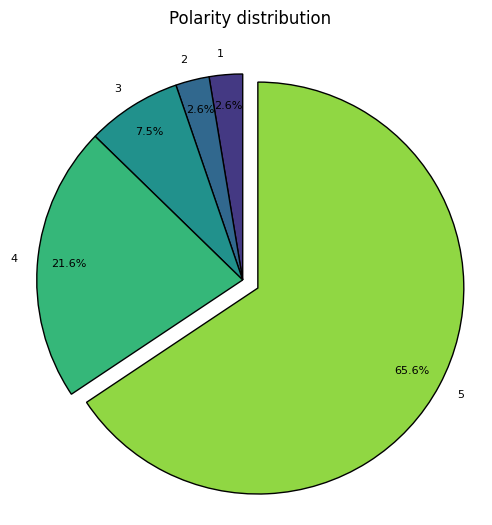

In [ ]:
labels = np.int8(data.groupby("Polarity").size().index)
explode = [0, 0, 0, 0, 0.1]
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(data.groupby("Polarity").size(), labels=labels,
       explode=explode, 
       shadow=False, startangle=90, autopct='%1.1f%%',
       colors=sns.color_palette("viridis", 5),
       wedgeprops={'edgecolor': 'black'},
       textprops={'fontsize': 8},
       pctdistance=0.85,
       radius=1.2,
       center=(0, 0)
       )
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Polarity distribution\n")

plt.show()



```python
import spacy

# Load Spanish language model
nlp = spacy.load("es_core_news_sm")

def is_spanish_word(word):
    doc = nlp(word)
    return doc[0].is_oov  # True if the word is Out-Of-Vocabulary (not Spanish)

words = ["hola", "mundo", "computer", "python", "casa"]
non_spanish_words = [word for word in words if is_spanish_word(word)]

print("Non-Spanish words:", non_spanish_words)
```

```python
import nltk
from nltk.corpus import words

# Download the word list
nltk.download("words")

# Load English words
english_words = set(words.words())

# Load a Spanish dictionary from wordlist
with open("spanish_wordlist.txt", "r", encoding="utf-8") as f:
    spanish_words = set(f.read().splitlines())

def is_spanish_word(word):
    return word.lower() in spanish_words and word.lower() not in english_words

words = ["hola", "mundo", "computer", "python", "casa"]
non_spanish_words = [word for word in words if not is_spanish_word(word)]

print("Non-Spanish words:", non_spanish_words)
```

### <font color="8C3061" >**References:**</font> 

[1] [Magic Towns in Mexico](https://github.com/CristyCarmona/Project_Magic_Towns-/blob/master/magic_towns2.ipynb) <br>
[2] [Using GeoPandas for analysis of geographic datasets](https://jluis-pcardenas.medium.com/using-geopandas-for-analysis-of-geographic-datasets-c151f63425ef) <br>
[3] [mapsmx](https://github.com/AzulGarza/mapsmx/tree/master)

